In [1]:
import pandas as pd
import matplotlib.pyplot as plt


from typing import Set, Dict, List, Tuple
from collections import defaultdict
from benchmark_data import BenchmarkData

In [2]:
data = BenchmarkData("../../../data/joinbench100.json")

In [3]:
names = data.get_report_names_in_order()

In [4]:
names

['join on onePercent/modular product',
 'join on onePercent/old comprehension',
 'join on onePercent/modular indexed',
 'join onePercent and twentyPercent/modular product',
 'join onePercent and twentyPercent/old comprehension',
 'join onePercent and twentyPercent/modular indexed',
 'join onePercent and fiftyPercent/modular product',
 'join onePercent and fiftyPercent/old comprehension',
 'join onePercent and fiftyPercent/modular indexed',
 'join even and odd/modular product',
 'join even and odd/old comprehension',
 'join even and odd/modular indexed']

In [5]:
group_names = data.get_benchmark_group_names()
group_names

{'join even and odd',
 'join on onePercent',
 'join onePercent and fiftyPercent',
 'join onePercent and twentyPercent'}

In [6]:
group_map = data.map_benchmark_groups_and_benchmark_indices()
group_map

defaultdict(set,
            {'join on onePercent': {(0, 'modular product'),
              (1, 'old comprehension'),
              (2, 'modular indexed')},
             'join onePercent and twentyPercent': {(3, 'modular product'),
              (4, 'old comprehension'),
              (5, 'modular indexed')},
             'join onePercent and fiftyPercent': {(6, 'modular product'),
              (7, 'old comprehension'),
              (8, 'modular indexed')},
             'join even and odd': {(9, 'modular product'),
              (10, 'old comprehension'),
              (11, 'modular indexed')}})

In [7]:
def get_mean(data, index: int) -> float:
    return data["reportAnalysis"][index]['anMean']['estPoint']
    
def get_means(data, indices: List[int]) -> List[float]:
    means: List[float] = []
    
    index: int
    for index in indices:
        means.append(get_mean(data, index))
        
    return means

In [8]:
data.get_benchmark_mean(0)

4.279127420934314e-08

In [9]:
def plot_benchmark_group_means(ax, data, group_name: str):
    group_map = data.map_benchmark_groups_and_benchmark_indices()
    experiments = group_map[group_name]

    indices, names = zip(*experiments)
    means = data.get_means_of_benchmark_list(indices)

    ax.set_title(f"Mean time to complete '{group_name}'")
    ax.set_ylabel("time (s)")
    ax.set_xlabel("function")
    
    ax.bar(names, means)
    
    return ax
    

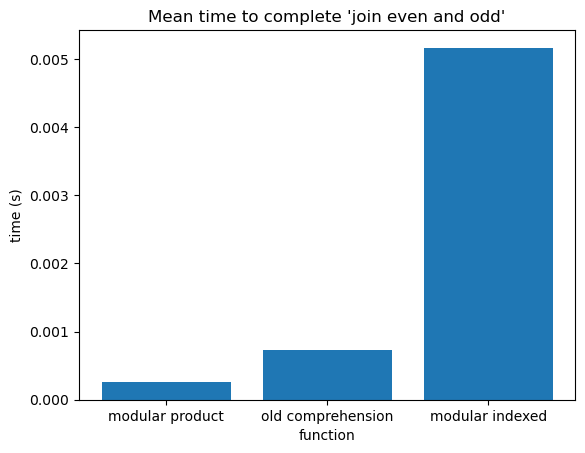

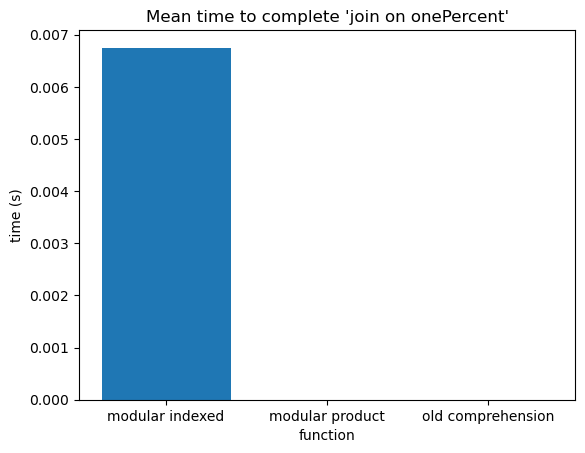

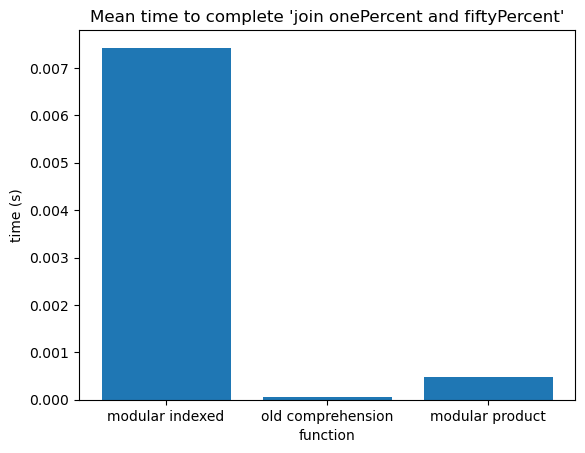

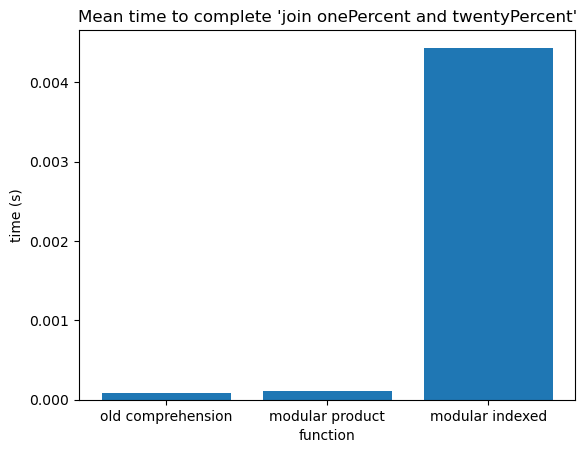

In [10]:
for group_name in group_names:
    fig, ax = plt.subplots()
    plot_benchmark_group_means(ax, data, group_name)
plt.show()







